# XGBoost (Wine) - Classification
[eXtreme Gradient Boost)](https://github.com/kyopark2014/ML-Algorithms/blob/main/boosting.md#xgboost-extreme-gradient-boost)

In [21]:
!pip install xgboost

You should consider upgrading via the '/Users/ksdyb/.pyenv/versions/3.9.12/bin/python3.9 -m pip install --upgrade pip' command.


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import numpy as np
import pandas as pd
import time

In [24]:
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [25]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [26]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [27]:
wine.isna().sum().sum()

0

In [28]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [29]:
wine['class'].sample(n=5)

4366    1.0
193     0.0
1540    0.0
1522    0.0
3659    1.0
Name: class, dtype: float64

### Shuffle

In [30]:
from sklearn.utils import shuffle
wine = shuffle(wine, random_state=2)

wine.head()

,alcohol,sugar,pH,class
799,10.7,3.6,3.29,0.0
1153,11.1,2.1,3.23,0.0
4915,12.0,1.1,3.16,1.0
2602,10.4,1.3,3.31,1.0
5267,11.2,11.0,3.07,1.0


In [31]:
wine['class'][1:10]

1153    0.0
4915    1.0
2602    1.0
5267    1.0
6482    1.0
5958    1.0
4862    1.0
5165    1.0
925     0.0
Name: class, dtype: float64

## Define Feature and Target

In [32]:
X = wine[['alcohol', 'sugar', 'pH']].to_numpy()
y = wine['class'].to_numpy()

## Classification Model Selection

In [33]:
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    # scores = cross_val_score(model, X, y, scoring='recall', cv=kfold)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [34]:
cross_validation(XGBClassifier(booster='gbtree'))  # default

Cross Validation:
Elased time: 1.37s
Accuracy: [0.88 0.88 0.89 0.88 0.88]
Avg. Accuracy: 0.88


In [35]:
cross_validation(XGBClassifier(booster='gblinear'))

Cross Validation:
Elased time: 0.17s
Accuracy: [0.74 0.74 0.75 0.74 0.74]
Avg. Accuracy: 0.74


In [36]:
cross_validation(XGBClassifier(booster='dart', one_drop=1))

Cross Validation:
Elased time: 5.80s
Accuracy: [0.86 0.87 0.89 0.88 0.88]
Avg. Accuracy: 0.88


In [37]:
from sklearn.ensemble import RandomForestClassifier

cross_validation(RandomForestClassifier())

Cross Validation:
Elased time: 1.07s
Accuracy: [0.89 0.9  0.91 0.89 0.9 ]
Avg. Accuracy: 0.90


## HPO

### Default

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# Utility function to estimate accuracy scores
def model_estimation(model):    
    start = time.time()
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    from sklearn.metrics import classification_report
    print('\nClassification Report:')
    print(classification_report(y_true=y_test, y_pred = y_pred))

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    print('Accuracy Score: %0.2f' % (accuracy_score(y_test,y_pred)))
    print('Precision Score: %0.2f' % (precision_score(y_test,y_pred,average='weighted')))
    print('Recall Score: %0.2f' % (recall_score(y_test,y_pred,average='weighted')))
    print('F1 Score: %0.2f' % (f1_score(y_test,y_pred,average='weighted')))
    print('Elapsed time: %0.2fs' % (time.time()-start)) 
    
    return accuracy_score(y_test,y_pred)

In [39]:
# default model
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

model.fit(X_train, y_train)    

best_score = model_estimation(model)
best_model = model

print('\nbest_score: %0.3f' % (best_score))


Confusion Matrix:
[[ 299   85]
 [ 102 1139]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       384
         1.0       0.93      0.92      0.92      1241

    accuracy                           0.88      1625
   macro avg       0.84      0.85      0.84      1625
weighted avg       0.89      0.88      0.89      1625

Accuracy Score: 0.88
Precision Score: 0.89
Recall Score: 0.88
F1 Score: 0.89
Elapsed time: 0.01s

best_score: 0.885


In [40]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

## HPO: Randomized Search

In [41]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    print("best parameter:", rand_clf.best_params_)    
    print("best score: {:.3f}".format(rand_clf.best_score_))

    # print("rand_clf.cv_results_: ", rand_clf.cv_results_)
    report(rand_clf.cv_results_)
    
    return best_model

In [42]:
import time
start = time.time()

randomized_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 0.7, 1, 2],
        'min_child_weight':[5, 10, 15, 20, 30],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.2, 0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.8}
best score: 0.868
Model with rank: 1
Mean validation score: 0.868 (std: 0.005)
Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.8}

Model with rank: 2
Mean validation score: 0.868 (std: 0.007)
Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 15, 'max_depth': 3, 'learning_rate': 0.4, 'gamma': 0.5, 'colsample_bytree': 1}

Model with rank: 3
Mean validation score: 0.868 (std: 0.009)
Parameters: {'subsample': 0.9, 'n_estimators': 50, 'min_child_weight': 10, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.7, 'colsample_bytree': 1}

Model with rank: 4
Mean validation score: 0.867 (std: 0.010)
Parameters: {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 15, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 1, 

In [43]:
best_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

## HPO: Bayesian Optimization 

In [44]:
from bayes_opt import BayesianOptimization

def xgbc_cv(n_estimators, learning_rate, max_depth, gamma, min_child_weight, subsample, colsample_bytree, ):
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        n_estimators=int(n_estimators),
                        learning_rate=learning_rate,
                        max_depth=int(max_depth),
                        gamma=gamma,
                        min_child_weight=min_child_weight,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

    xgb.fit(X_train, y_train)    

    y_pred = xgb.predict(X_test)

    score = accuracy_score(y_pred, y_test)

    print('score=', score)

    return score

hyperparameter_space = {
    'n_estimators': (50, 800),
    'learning_rate': (0.01, 1.0),
    'max_depth': (1, 8),
    'gamma' : (0.01, 1),
    'min_child_weight': (1, 20),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.1, 1)
}

optimizer = BayesianOptimization(f=xgbc_cv, pbounds=hyperparameter_space, random_state=2, verbose=0)

#gp_params = {"alpha": 1e-10}
#optimizer.maximize(init_points=3,n_iter=10,acq='ucb', kappa= 3, **gp_params)    

#optimizer.maximize(init_points=2, n_iter=10)
optimizer.maximize(init_points=3, n_iter=5, acq='ei')


optimizer.max

score= 0.8590769230769231
score= 0.8596923076923076
score= 0.8646153846153846
score= 0.8676923076923077
score= 0.8756923076923077
score= 0.8627692307692307
score= 0.8726153846153846
score= 0.8652307692307692


{'target': 0.8756923076923077,
 'params': {'colsample_bytree': 0.7373707021096741,
  'gamma': 0.92528855572483,
  'learning_rate': 0.19725624318675722,
  'max_depth': 2.474223126342955,
  'min_child_weight': 18.474849545251434,
  'n_estimators': 110.14187695285561,
  'subsample': 0.989936842298216}}

In [45]:
best_params = optimizer.max['params']

In [46]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        n_estimators=int(best_params['n_estimators']), 
                        learning_rate=best_params['learning_rate'], 
                        max_depth=int(best_params['max_depth']), 
                        gamma=best_params['gamma'], 
                        min_child_weight=int(best_params['min_child_weight']), 
                        subsample=best_params['subsample'], 
                        colsample_bytree=best_params['colsample_bytree'],
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

model.fit(X_train, y_train)    

y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('score=', score)     

if(score > best_score): 
    best_score = score
    best_model = model
    
    best_score = model_estimation(model)
    print('\nbest_score: %0.3f' % (best_score))

score= 0.8775384615384615


## Evaluation

In [47]:
cross_validation(best_model)   
model_estimation(best_model)     

Cross Validation:
Elased time: 0.97s
Accuracy: [0.88 0.88 0.89 0.88 0.88]
Avg. Accuracy: 0.88

Confusion Matrix:
[[ 299   85]
 [ 102 1139]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       384
         1.0       0.93      0.92      0.92      1241

    accuracy                           0.88      1625
   macro avg       0.84      0.85      0.84      1625
weighted avg       0.89      0.88      0.89      1625

Accuracy Score: 0.88
Precision Score: 0.89
Recall Score: 0.88
F1 Score: 0.89
Elapsed time: 0.01s


0.8849230769230769

## Feature Importances

Feature Importances:
[0.22051688 0.5896323  0.18985084]
You should consider upgrading via the '/Users/ksdyb/.pyenv/versions/3.9.12/bin/python3.9 -m pip install --upgrade pip' command.


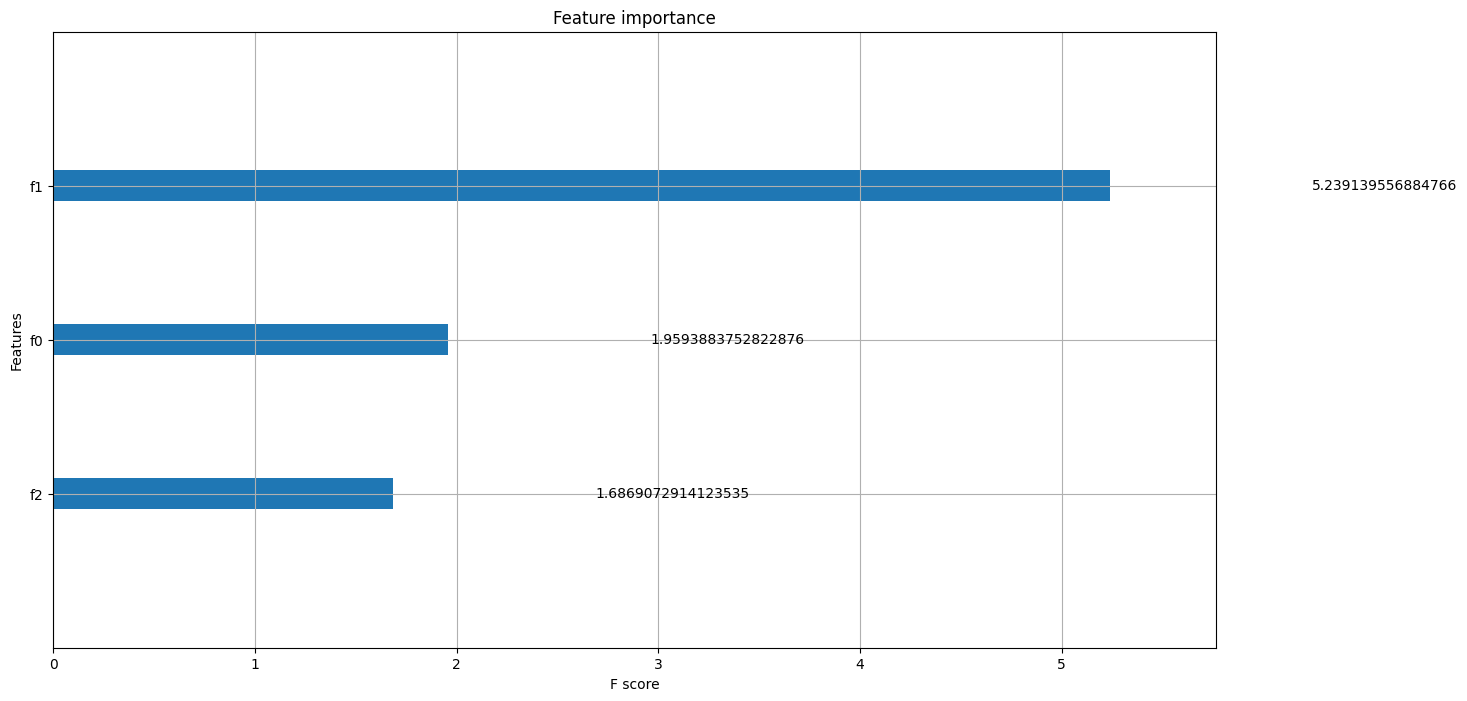

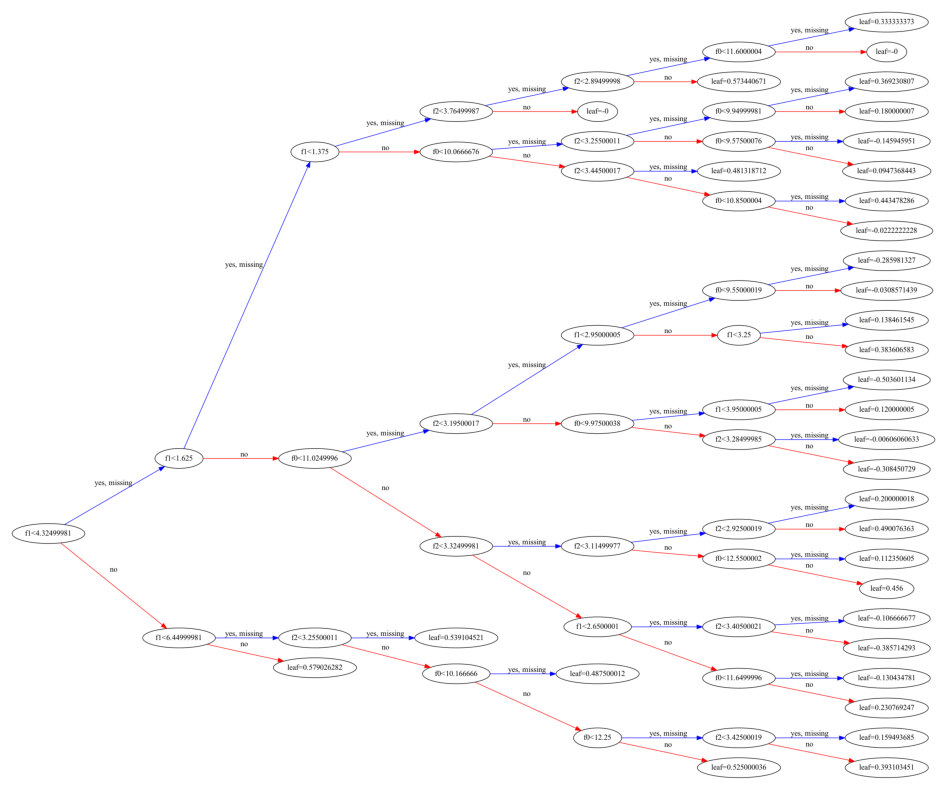

In [48]:
print('Feature Importances:')
print(best_model.feature_importances_)

import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
best_model.get_booster().feature_names = feature_data.feature_names
best_model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(best_model, ax=ax, importance_type='gain')

!pip install graphviz

xgb.plot_tree(best_model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()